<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
## 1. make_blobs toy data 
X, y = datasets.make_blobs(random_state = 1)
kmeans = KMeans(n_clusters = 3) # 3개의 클래스를 나타내는 데이터를 만들어 줌.
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
## 2. checking labels
kmeans.labels_

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

In [5]:

## 3. X predict  
kmeans.predict(X)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

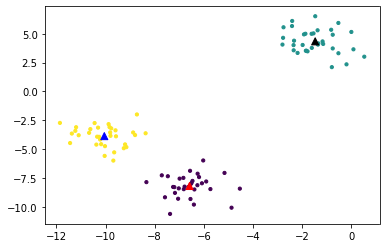

In [6]:
## 4. scatter graph
%matplotlib inline
plt.scatter(X[:,0], X[:,1],
           c = kmeans.labels_, marker = 'o', s = 10)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            c = ['r', 'k', 'b'], marker = '^', s = 50)
plt.show()

In [7]:
## k = 5
kmeans5 = KMeans(n_clusters = 5) # 5개의 클래스를 나타내는 데이터를 만들어 줌.
kmeans5.fit(X)
assign = kmeans5.labels_

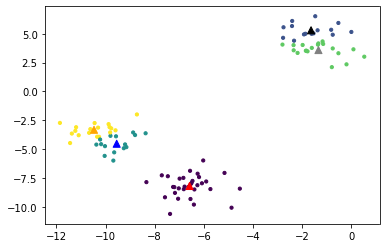

In [8]:
plt.scatter(X[:,0], X[:,1],
           c = assign, marker = 'o', s = 10)
plt.scatter(kmeans5.cluster_centers_[:,0],
            kmeans5.cluster_centers_[:,1],
            c = ['r', 'k', 'b', 'gray', 'orange'], marker = '^', s = 50)
plt.show()

- K 의 값을 변경했을 때 결과는 위의 그래프와 같다. 여기서 적합한 k의 값을 찾기 위해서는 PCA를 사용하여 데이터의 형태가 어떻게 되어 있는지 판단하고 군집화 진행하는 것을 추천

[병합 군집]


시작할 때, 각각의 포인트 하나하나가 클러스터로 지정됨
종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐 나간다.
사이킷런의 종료 조건은 클러스터 개수
linkage옵션에서 가장 비슷한 클러스터를 측정하는 방법 지정
ward: 기본값인 ward연결은 클로스터의 분산을 가장 작게 증가시키는 두 클러스터를 합침
average: 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터 병합
complete: 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터 병합

- 계층적 클러스터링  : 군집 하나의 데이터 샘플을 하나의 클러스터로 보고 가장 유사도가 높은 클러스터를 합치면서 클러스터 갯수를 줄여 가는 방법을 말한다.

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
import matplotlib.pyplot as plt

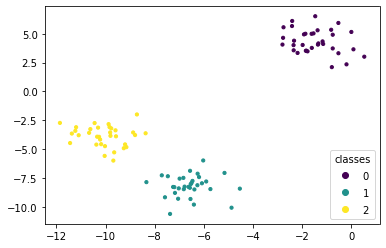

In [12]:
X, y = datasets.make_blobs(random_state = 1)
agg = AgglomerativeClustering(n_clusters = 3)
assign = agg.fit_predict(X)
%matplotlib inline
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1],
                    c = assign, marker="o", s=10)
ax.legend(*scatter.legend_elements(),
         loc = 'lower right', title = 'classes')

덴드로그램(dendrogram) 사용 :  SciPy 패키지 -> 결과를 시각화 해줌

Text(0, 0.5, 'cluster distance')

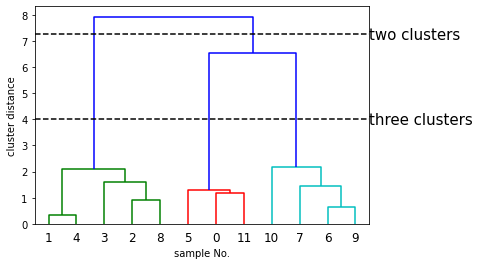

In [13]:
from scipy.cluster.hierarchy import dendrogram, ward
import seaborn as sns 

X,y = datasets.make_blobs(random_state=0, n_samples=12)

linkage_array = ward(X) # 분산을 최소화하는 방향으로 클러스터 함
dendrogram(linkage_array) # 위계를 가지는 형태로 만들어줌 

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'two clusters', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, 'three clusters', va='center', fontdict={'size':15})
plt.xlabel('sample No.')
plt.ylabel('cluster distance')

[DBSCAN]

density-based spatial clustering of applications with nois
클러스터의 개수를 미리 정할 필요가 없음
복잡한 형상도 찾을 수 있으며, 어떤 클래스에도 속하지 않는 포인트를 비교적 잘 구분해낸다
병합군집, k-mean 보다는 느림

특성 공간에서 가까이 있는 데이터가 많은, 밀도가 높은 지역의 포인트를 찾음
데이터 밀집 지역이 한 클러스터를 구성하며, 비교적 비어 있는 지역을 경계로 다른 클러스터와 구분된다는 아이디어
min_sample, eps 2개의 매개변수
한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 만큼 있으면, 이 데이터 포인트를 핵심 샘플로 분류
eps 거리 안에 min_samples보다 데이터가 적으면 잡음으로 분류
시작할 때는 모자이크 포인트 선택

cluster label:[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
cluster label:[0 1 1 1 1 0 0 0 1 0 0 0]


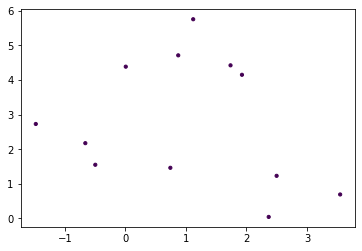

In [16]:
from sklearn.cluster import DBSCAN
from sklearn import datasets
import matplotlib.pyplot as plt

X,y = datasets.make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("cluster label:{}".format(clusters))
# output : cluster label:[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
# 해석 :  전부다 잡음이다 클러스터로 분류되지 않았다. 군집으로 분류되지 않았다.

# 그래프 확인(defualt)
%matplotlib inline
plt.scatter(X[:,0],X[:,1],c=clusters, marker = 'o',s=10)


dbscan1 = DBSCAN(min_samples=2, eps=2)
clusters1 = dbscan1.fit_predict(X)
print("cluster label:{}".format(clusters1))
# output : cluster label:[0 1 1 1 1 0 0 0 1 0 0 0]
# 해석 : 0으로 바뀐 두개가 군집화가 된 것을 확인 할 수 있음


In [17]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import numpy as np

X, y = datasets.make_moons(n_samples=200, noise = 0.05, random_state=0)  # 초승달 데이터 -> 그래프가 초승달로 나옴

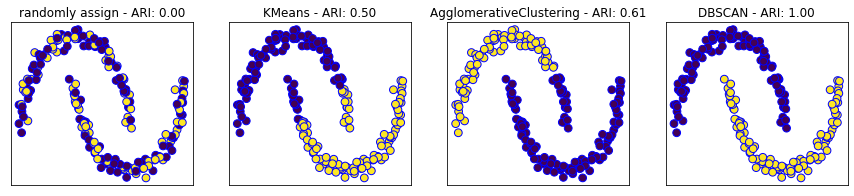

In [19]:
# 평균이 0, 분산이 1이 되도록 표준화
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4,figsize=(15,3),
                        subplot_kw={'xticks':(), 'yticks':()})

# 사용할 알고리즘 모델의 리스트 작성
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
             DBSCAN()]

# randomly assign에서 ARI=0인 그래프 작성 위해 무작위 클러스터 생성
random_state = np.random.RandomState(seed=0) # 랜덤넘버 생성기인 랜덤함수들을 포함하는 클래스
random_clusters = random_state.randint(low=0,high=2,size=len(X)) # 0 부터 2사이의 무작이 난수 생성 

# 위에서 생성한 무작위 클러스터 plotting
axes[0].scatter(X_scaled[:,0],X_scaled[:,1], c=random_clusters, s=60, edgecolors = 'b')
axes[0].set_title("randomly assign - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

# 3가지 군집 알고리즘 적용한 결과 plotting
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters,
              s=60, edgecolors = 'b')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                          adjusted_rand_score(y,clusters)))             

- 그래프를 확인하면 DBSCAN 이 가장 잘 군집화 한 것이라고 생각할 수 있다. 하지만 더 확실하게 하기 위해서는 평가지표를 통한 확인이 필요하다. 이것은 다음 장에서 설명하겠습니다.